In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', facecolor='w')
plt.rc('font', size=11)

In [2]:
string = np.loadtxt('data/YOPH.string').T
pmf = np.loadtxt('data/YOPH_pmf.dat').T

In [3]:
def plot_a(ax):
    ax.set_xlabel('s (a.m.u.$^{1/2}\cdot\AA$)')
    ax.set_ylabel('PMF (kcal/mol)')
    ax.set_xlim([0, 50])
    ax.set_ylim([-5, 15])
    ax.plot(pmf[1], pmf[2] - np.min(pmf[2,:100]), c='navy')

In [4]:
def plot_b(ax1):
    ax2 = ax1.twinx()
    ax1.set_xlabel('s (a.m.u.$^{1/2}\cdot\AA$)')
    ax2.set_ylabel('Distance ($\AA$)')
    ax1.set_xlim(-3, 42)
    ax2.set_ylim(1.5,14.5)
    ax1.set_ylabel('Angle ($\degree$)', labelpad=-5)
    ax1.set_ylim(-240,360)
    x = string[0]

    colors = ('blue', 'red', 'purple', 'green', 'orange')
    labels = ('$\Psi_{357}$', 
              '$\Phi_{358}$',
              '$d_1$', 
              '$d_2$',
              '$d_3$',)
    for y, c in zip(string[4:6], colors[3:]):
        ax1.plot(x, y, c=c)    
    for y, c in zip(string[1:4], colors[:3]):
        ax2.plot(x, y, c=c, linestyle='dashed')    

    ax1.legend(ax1.lines + ax2.lines, labels, loc='lower center', 
               ncol=5, columnspacing=0.5, handletextpad=0.4, )

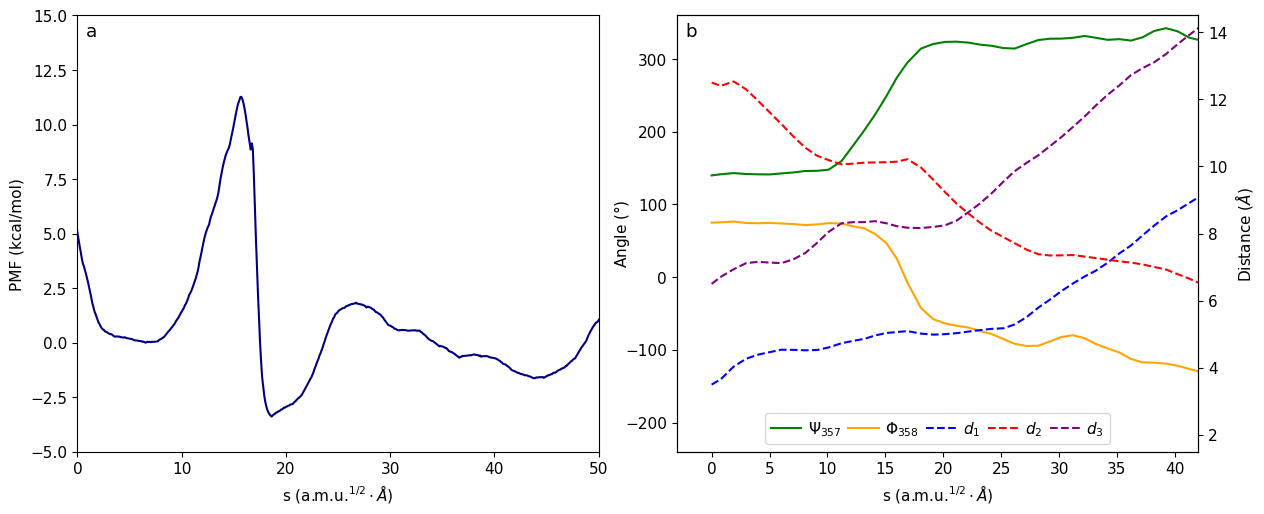

In [8]:
import matplotlib.transforms as mtransforms

fig, axs = plt.subplot_mosaic([['a', 'b']], figsize=(12,5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.15)
plot_a(axs['a'])
plot_b(axs['b'])

for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(-0.01, 1.0, label, transform=ax.transAxes + trans, 
            verticalalignment='top', fontsize='large')

plt.savefig('FigE1.png', dpi=300, bbox_inches='tight')
plt.show()